In [1]:
#### Implementation of ANN with SGD and Backprop
#### original OOP implementation can be found at: https://medium.com/binaryandmore/beginners-guide-to-deriving-and-implementing-backpropagation-e3c1a5a1e536
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
## layer:
## take input X: (Nx1)
## multiply by weights W: (h1xN)
## add bias b: (h1x1)
def layer(X, W, b): return np.dot(W, X) + b

In [3]:
## lets take the activation as sigmoid (element-wise)
def sigmoid(x): return 1 / (1 + np.exp(-x))

In [4]:
## lets define the derivative of the sigmoid
def sigmoid_prime(x): return sigmoid(x)*(1.0 - sigmoid(x))

In [5]:
## define the mse cost per sample
def mse(y_pred, y_true): return (1 / 2) * np.square(y_pred - y_true)

In [6]:
## derivative of mse
def mse_prime(y_pred, y_true): return (y_pred - y_true)

In [7]:
## NN parameters
N = 50 #input size
num_nes = [N, 40, 30, 20, 10]
num_layers = len(num_nes) - 1
learning_rate = 0.01
num_epochs = 1000
num_data_samples = 100

## dict to hold neuron input-output pairs
layer_in_out_dict = dict()
## dict to hold the cost derivatives w.r.t to the params
layer_derivative_dict = dict()

In [8]:
## the dict to hold the layer weights and biases
weight_dict = {'w'+str(i): np.random.normal(size=(num_nes[i+1], num_nes[i])) for i in range(num_layers)}
bias_dict = {'b'+str(i): np.random.normal(size=(num_nes[i+1], 1)) for i in range(num_layers)}

In [9]:
def NN(inputs):
    a = inputs
    layer_in_out_dict['a0'] = a
    ## forward pass
    for i in range(num_layers):
        #print(i)
        z = layer(a, weight_dict['w'+str(i)], bias_dict['b'+str(i)])
        a = sigmoid(z)
        layer_in_out_dict['z'+str(i)] = z
        layer_in_out_dict['a'+str(i+1)] = a
    out = a
    return out

In [10]:
## Test the NN with a dummy forward pass
inp = np.random.uniform(0, 1, size=(N,1)) * 255.0
out_true = np.random.uniform(0, 1, size=(num_nes[-1], 1))
out = NN(inp)
error = mse(out, out_true)
print(np.mean(error))

0.12370761575569729


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [11]:
## Function to perform model prediction
def predict(inputs): return NN(inputs)

In [12]:
def compute_grads(inputs, targets):
    ## perform a forward pass (prediction)
    out = predict(inputs)
    ## Compute dC/dzL, dC/dwL and dC/dbL
    ## first dC/dzL = (a - y) * a * (1 - a)
    layer_derivative_dict['dz'+str(num_layers-1)] = mse_prime(out, targets) * out * (1 - out)
    ## second compute the dC/dwL = dC/dzL * dzL/dwL
    #print(layer_derivative_dict['dz'+str(num_layers-1)].shape)
    #print(layer_in_out_dict['a'+str(num_layers-1)].shape)
    layer_derivative_dict['dw'+str(num_layers-1)] = np.dot(layer_derivative_dict['dz'+str(num_layers-1)], \
                                                    np.transpose(layer_in_out_dict['a'+str(num_layers-1)]))
    ## third calculate the dC/dbL = dC/dzL * dzL/dbL
    layer_derivative_dict['db'+str(num_layers-1)] = layer_derivative_dict['dz'+str(num_layers-1)] * 1
    
    ## Now since we have the derivatives at the output layer, we can calculate the derivatives for the rest of the 
    ## layers
    for i in reversed(range(num_layers-1)):
        #print(i)
        ## first compute dC/dzl = [w(l+1)*dC/dz(l+1)]*sigmoid_prime(zl)
        layer_derivative_dict['dz'+str(i)] = np.dot(
                                                np.transpose(weight_dict['w'+str(i+1)]), layer_derivative_dict['dz'+str(i+1)]) \
                                                * sigmoid_prime(layer_in_out_dict['z'+str(i)])
        ## second compute dC/dwl = dC/dzl * dzl/dwl
        layer_derivative_dict['dw'+str(i)] = layer_derivative_dict['dz'+str(i)] * \
                                                    np.transpose(layer_in_out_dict['a'+str(i)])
        
        ## third compute dC/dbl = dC/dzl * dzl/dbl
        layer_derivative_dict['db'+str(i)] = layer_derivative_dict['dz'+str(i)] * 1

In [13]:
## test the gradient computation 
compute_grads(inp, out_true)
#print(layer_derivative_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [14]:
def update_param():
    for i in range(num_layers):
        weight_dict['w'+str(i)] = weight_dict['w'+str(i)] - learning_rate * layer_derivative_dict['dw'+str(i)]
        bias_dict['b'+str(i)] = bias_dict['b'+str(i)] - learning_rate * layer_derivative_dict['db'+str(i)]

In [15]:
## test param update function
update_param()

In [16]:
## make a dummy training dataset
inp_data = np.random.normal(size=(num_data_samples, num_nes[0]))
out_true_data = np.random.normal(size=(num_data_samples, num_nes[-1]))
#print(training_data)

In [17]:
mean_epoch_error_list = list()
for e in range(num_epochs):
    epoch_loss_list = list()
    for i in range(num_data_samples):
        inp = np.expand_dims(inp_data[i], 1)
        out_true = np.expand_dims(out_true_data[i], 1)
        #print(inp.shape)
        compute_grads(inp, out_true)
        update_param()
        out = predict(inp)
        error = np.mean(mse(out, out_true))
        epoch_loss_list.append(error)
    mean_epoch_error = np.mean(np.array(epoch_loss_list))
    mean_epoch_error_list.append(mean_epoch_error)
    print("Epoch loss: {}".format(mean_epoch_error))

Epoch loss: 0.6828353110735378
Epoch loss: 0.6570007139115107
Epoch loss: 0.6449701705618005
Epoch loss: 0.6271649282131954
Epoch loss: 0.5956337795448341
Epoch loss: 0.5707739135411495
Epoch loss: 0.5611372184912357
Epoch loss: 0.5569615904344963
Epoch loss: 0.5545598337796804
Epoch loss: 0.5529027761870106
Epoch loss: 0.5516219470256085
Epoch loss: 0.5505524241728108
Epoch loss: 0.5496094845402529
Epoch loss: 0.5487454526871225
Epoch loss: 0.5479315161963878
Epoch loss: 0.5471493371786975
Epoch loss: 0.5463869777537365
Epoch loss: 0.5456366387528175
Epoch loss: 0.5448928940404212
Epoch loss: 0.5441508771250213
Epoch loss: 0.5434044460319657
Epoch loss: 0.5426443728852497
Epoch loss: 0.5418560352866607
Epoch loss: 0.5410151635634798
Epoch loss: 0.5400783053117385
Epoch loss: 0.538958648124844
Epoch loss: 0.5374548993163318
Epoch loss: 0.5349966480682032
Epoch loss: 0.5295609779095286
Epoch loss: 0.5157100832622429
Epoch loss: 0.49971924726549033
Epoch loss: 0.49362556019426657
Epoch l

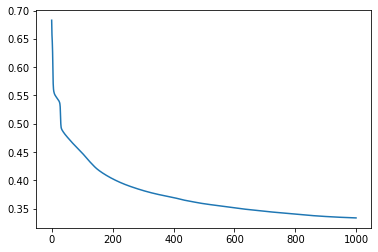

In [18]:
## Plot the model performance
plt.plot(np.arange(0, num_epochs, 1), mean_epoch_error_list)

## EXERCISE: 
### <span style="color:red"> Deadline: 22/11/2021 <span>

### load mnist data using
#### mnist = tf.keras.datasets.mnist

In [19]:
## load mnist data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


### Define the following hyper parameters
#### Parameters to make a new neural network with the correct input and output sizes
#### Learning rate
#### number of layers
#### number of epochs
#### Refer to cell (8)

In [20]:
## make a mlp to process them
N = 784
num_nes = [N, 40, 30, 20, 10]
num_layers = len(num_nes) - 1
learning_rate = 0.01
num_epochs = 10
threshold = 0.5

#### Reuse the layer dictionaries, weight dictionary and bias dictionary in cells (8) and (9)

In [21]:
## initialize the layer derivative and in out dicts
## dict to hold neuron input-output pairs
layer_in_out_dict = dict()
## dict to hold the cost derivatives w.r.t to the params
layer_derivative_dict = dict()
## Initialize the weights
## the dict to hold the layer weights and biases
weight_dict = {'w'+str(i): np.random.normal(size=(num_nes[i+1], num_nes[i])) for i in range(num_layers)}
bias_dict = {'b'+str(i): np.random.normal(size=(num_nes[i+1], 1)) for i in range(num_layers)}

### If necessary, write a function to onehot encode the scalar labels

In [22]:
def onehot(label):
    ## make an empty vector
    onehot_label = np.zeros((num_nes[-1], 1))
    onehot_label[label] = 1
    return onehot_label

### Define a function to calculate the accuracy (Use a threshold value to determine the sigmoid firing at the output layer when calculating the accuracy (This is because of the sigmoid function, If we use softmax, the logits are normalised so taking the maximum of the activation gives the predicted class))

In [23]:
def accuracy(preds, target, is_validation=False):
    ## threshold the predictions to 0,1
    #print(targets.shape)
    #print(preds > 0.1)
    positive_preds = 0
    for i in range(preds.shape[1]):
        ## current pred boolean
        # since sigmoid, NOT softmax, we index from the prediction vector
        # using the target label and use a threshold value to determine
        # if the prediction is good. This method is only suitable for 
        # a binary classification case (class is true or false, 0 or 1),
        # not for the multiclass classification
        if is_validation:
            pred = preds[i][target[i]] > threshold
        else:
            pred = preds[target] > threshold
        if pred:
            positive_preds += 1
    return positive_preds / preds.shape[1]

### Train the neural network and plot the following (Extend the cell (18) accordingly)
#### For validation directly use the test set
#### Mean train error per epoch (Plot for all the epochs)
#### Mean validation error per epoch (Plot for all the epochs)
#### Mean train accuracy per epoch (Plot for all the epochs)
#### Mean validation accuracy per epoch (Plot for all the epochs)

In [25]:
def infer(inputs):
    pred_list = list()
    for i in range(inputs.shape[0]):
        inp = np.expand_dims(inputs[i].flatten(), 1)
        #print(inp.shape)
        pred = predict(inp)
        #print(pred.shape)
        pred_list.append(np.swapaxes(pred, 0, 1))
    #print(np.array(pred_list).shape)
    return np.squeeze(np.swapaxes(np.array(pred_list), 0, 1), 0)

In [26]:
mean_epoch_error_list = list()
mean_epoch_train_accuracy_list = list()
mean_epoch_test_accuracy_list = list()
for e in range(num_epochs):
    epoch_loss_list = list()
    train_epoch_accuracy_list = list()
    for i in range(train_images.shape[0]):
        inp = np.expand_dims(train_images[i].flatten(), 1)
        #print(inp.shape)
        out_true = onehot(train_labels[i])
        #print(out_true.shape)
        compute_grads(inp, out_true)
        update_param()
        out = predict(inp)
        error = np.mean(mse(out, out_true))
        epoch_loss_list.append(error)
        train_sample_accuracy = accuracy(out, train_labels[i])
        train_epoch_accuracy_list.append(train_sample_accuracy)
    
    mean_epoch_error = np.mean(np.array(epoch_loss_list))
    mean_epoch_error_list.append(mean_epoch_error)

    mean_epoch_train_accuracy = np.mean(np.array(train_epoch_accuracy_list))
    mean_epoch_train_accuracy_list.append(mean_epoch_train_accuracy)
    print("Epoch loss: {}".format(mean_epoch_error))
    print("Train accuracy: {}".format(mean_epoch_train_accuracy * 100.0))
    
    ## do a validation and get the accuracy
    test_preds = infer(test_images)
    #print(test_preds.shape)
    test_accuracy = accuracy(test_preds, test_labels, is_validation=True)
    mean_epoch_test_accuracy_list.append(test_accuracy)
    print("Test accuracy: {}".format(test_accuracy * 100.0))
    print("")

Epoch loss: 0.029906878477864492
Train accuracy: 29.93166666666667
Test accuracy: 50.0

Epoch loss: 0.022856540111716124
Train accuracy: 51.65833333333333
Test accuracy: 50.0

Epoch loss: 0.01844107550813689
Train accuracy: 63.685
Test accuracy: 70.0

Epoch loss: 0.014964722703689782
Train accuracy: 74.44833333333334
Test accuracy: 70.0

Epoch loss: 0.012667209432436311
Train accuracy: 79.58666666666666
Test accuracy: 80.0

Epoch loss: 0.011153577988140264
Train accuracy: 82.34666666666666
Test accuracy: 80.0

Epoch loss: 0.010078882154366314
Train accuracy: 84.23
Test accuracy: 80.0

Epoch loss: 0.009285365548968983
Train accuracy: 85.51166666666667
Test accuracy: 80.0

Epoch loss: 0.008679885830534678
Train accuracy: 86.53166666666667
Test accuracy: 90.0

Epoch loss: 0.008190965879920905
Train accuracy: 87.35000000000001
Test accuracy: 90.0



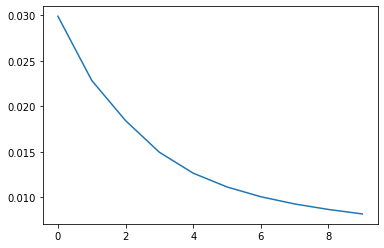

In [27]:
plt.plot(np.arange(0, num_epochs, 1), mean_epoch_error_list) # Train error; try yourself the validation error

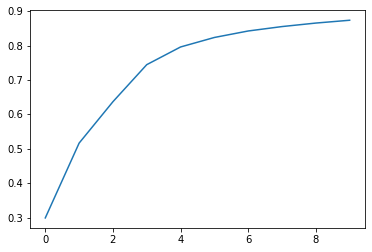

In [28]:
plt.plot(np.arange(0, num_epochs, 1), mean_epoch_train_accuracy_list)

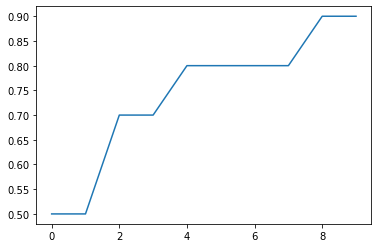

In [29]:
plt.plot(np.arange(0, num_epochs, 1), mean_epoch_test_accuracy_list)

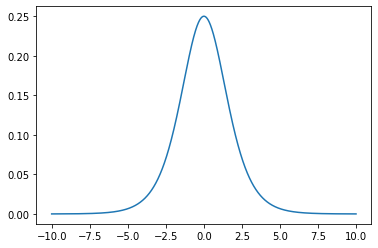

In [30]:
# How sigmoid prime looks like
## check the sigmoid prime
X = np.arange(-10, 10, 0.01)
sp = list(map(lambda x: sigmoid_prime(x), X))
plt.plot(X, sp)

(28, 28)


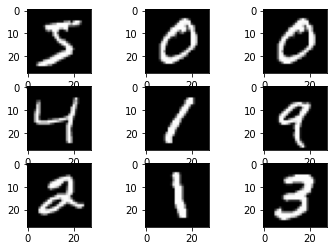

In [33]:
print(train_images[2].shape)
figure, ax = plt.subplots(3, 3)
ax[0, 0].imshow(train_images[0], cmap='gray')
ax[0, 1].imshow(train_images[1], cmap='gray')
ax[0, 2].imshow(train_images[1], cmap='gray')
ax[1, 0].imshow(train_images[2], cmap='gray')
ax[1, 1].imshow(train_images[3], cmap='gray')
ax[1, 2].imshow(train_images[4], cmap='gray')
ax[2, 0].imshow(train_images[5], cmap='gray')
ax[2, 1].imshow(train_images[6], cmap='gray')
ax[2, 2].imshow(train_images[7], cmap='gray')
plt.show()

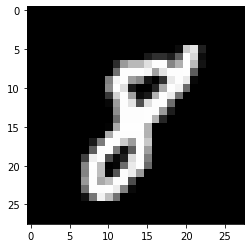

In [34]:
# check if the 9 is classified correctly
plt.imshow(train_images[17], cmap='gray')

In [35]:
inp = np.expand_dims(train_images[17].flatten(), 1)
print(inp.shape)
out = predict(inp)
print(np.argmax(out))

(784, 1)
8


In [36]:
# layer analysis
for j in range(len(num_nes)-1):
    for i, val in enumerate(layer_derivative_dict['dw'+str(j)]):
        #print(val)
        #print(i+1)
        ## count the neurons which has zero gradient; zero gradients means no updates happending at that neuron
        zero_grads = len(list(filter(lambda x: True if x < 1e-10 else False, val)))
        print("Neuron ID: {}, number of zero gradients: {} out of {}".format(i+1, zero_grads, len(val)))
    print()

Neuron ID: 1, number of zero gradients: 784 out of 784
Neuron ID: 2, number of zero gradients: 784 out of 784
Neuron ID: 3, number of zero gradients: 784 out of 784
Neuron ID: 4, number of zero gradients: 784 out of 784
Neuron ID: 5, number of zero gradients: 671 out of 784
Neuron ID: 6, number of zero gradients: 784 out of 784
Neuron ID: 7, number of zero gradients: 784 out of 784
Neuron ID: 8, number of zero gradients: 641 out of 784
Neuron ID: 9, number of zero gradients: 641 out of 784
Neuron ID: 10, number of zero gradients: 641 out of 784
Neuron ID: 11, number of zero gradients: 784 out of 784
Neuron ID: 12, number of zero gradients: 784 out of 784
Neuron ID: 13, number of zero gradients: 784 out of 784
Neuron ID: 14, number of zero gradients: 641 out of 784
Neuron ID: 15, number of zero gradients: 784 out of 784
Neuron ID: 16, number of zero gradients: 641 out of 784
Neuron ID: 17, number of zero gradients: 674 out of 784
Neuron ID: 18, number of zero gradients: 784 out of 784
N